# Classification of blood donation using Support Vector Mashine 

## Data&description: https://openml.org/search?type=data&id=1464&sort=runs&status=active

In [ ]:
#libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [2]:
#reading arff file and converting to pandas Dataframe
from scipy.io import arff

data = arff.loadarff('php0iVrYT.arff')
train= pd.DataFrame(data[0])
train.head()

,V1,V2,V3,V4,Class
0,2.0,50.0,12500.0,98.0,b'2'
1,0.0,13.0,3250.0,28.0,b'2'
2,1.0,16.0,4000.0,35.0,b'2'
3,2.0,20.0,5000.0,45.0,b'2'
4,1.0,24.0,6000.0,77.0,b'1'


In [3]:
train["Class"]=train["Class"].apply(lambda x: x.decode('utf8'))
train['Class']=train['Class'].astype(float)
train

,V1,V2,V3,V4,Class
0,2.0,50.0,12500.0,98.0,2.0
1,0.0,13.0,3250.0,28.0,2.0
2,1.0,16.0,4000.0,35.0,2.0
3,2.0,20.0,5000.0,45.0,2.0
4,1.0,24.0,6000.0,77.0,1.0
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,1.0
744,21.0,2.0,500.0,52.0,1.0
745,23.0,3.0,750.0,62.0,1.0
746,39.0,1.0,250.0,39.0,1.0


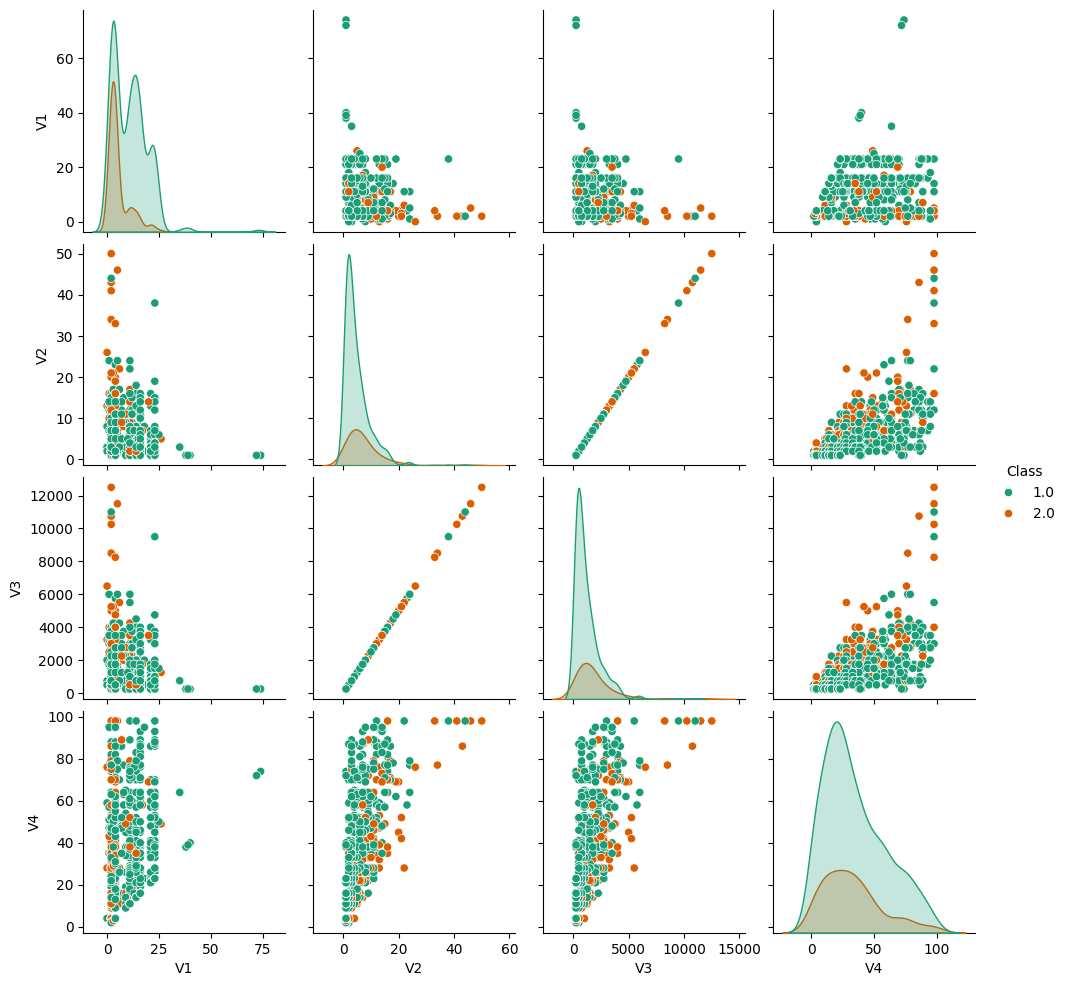

In [4]:
#ploting to see distribution of values 
sns.pairplot(train,hue='Class',palette='Dark2')

In [5]:
X = train.drop('Class',axis=1)
y= train['Class']

In [6]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#feeding data 
svc = LinearSVC(dual=False)
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
print(accuracy_score(y_test,pred))



0.7533333333333333


In [7]:
#check if scaling will give an advantage (  No:(   )
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))

X_test_scaled = scaler.transform(X_test.astype(np.float32))

lin_clf = LinearSVC(random_state=42,dual=False)

lin_clf.fit(X_train_scaled, y_train)

y_pred = lin_clf.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.7533333333333333

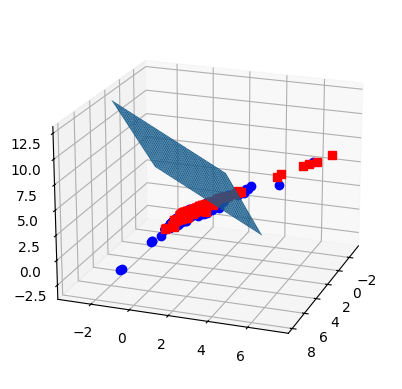

In [8]:
#plotting 3 first features and hyperplane 
z = lambda x,y: (-lin_clf.intercept_[0]-lin_clf.coef_[0][0]*x-lin_clf.coef_[0][1]*y) / lin_clf.coef_[0][2]

tmp = np.linspace(-3,3,30)
xx,yy = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z(xx,yy))
ax.plot3D(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], X_train_scaled[y_train==1,2],'ob')
ax.plot3D(X_train_scaled[y_train==2,0], X_train_scaled[y_train==2,1], X_train_scaled[y_train==2,2],'sr')
ax.view_init(20,20) 
plt.show()

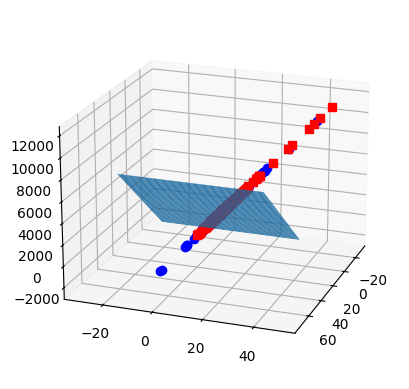

In [9]:
graph = LinearSVC(C=5,max_iter=1000,dual=False)
graph.fit(X,y)


z = lambda x,y: (-graph.intercept_[0]-graph.coef_[0][0]*x-graph.coef_[0][1]*y) / graph.coef_[0][2]

tmp = np.linspace(-30,30,100)
xx,yy = np.meshgrid(tmp,tmp)

X=X.to_numpy()

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z(xx,yy))
ax.plot3D(X[y==1,0], X[y==1,1], X[y==1,2],'ob')
ax.plot3D(X[y==2,0], X[y==2,1], X[y==2,2],'sr')
ax.view_init(20,20) 
plt.show()

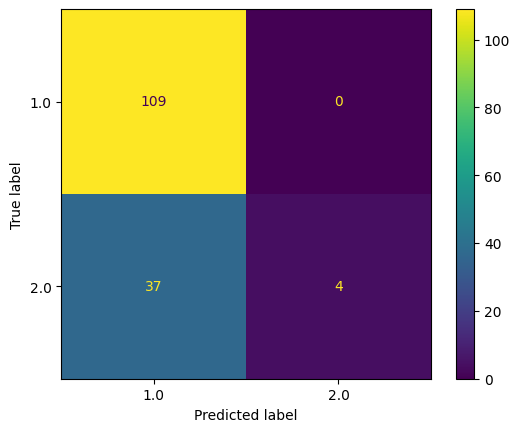

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#Building confusion matrix of predictions
cm = confusion_matrix(y_test, pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

In [12]:
from sklearn.metrics import (precision_score,recall_score,f1_score)

precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1score = f1_score(y_test, pred)
 
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

'''
As a result,model has predicted all samples of 1 class and poorly predicted 2-class samples.
The problem could be in a big difference in amounts of training samples(570 1class samples to 178 2class samples)
'''

Precision = 0.7465753424657534
Recall = 1.0
F1 Score = 0.8549019607843137


In [13]:
len(train[train['Class']==2])

178

In [14]:
len(train[train['Class']==1])

570